In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vgsales.csv')

In [2]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:

"""Le dataset contient

le nom de chaque jeux (Name), 
les ventes en million de dollars dans le monde et par région du monde (***_Sales), 
son rang en terme de vente (Rank),
La plateforme du jeux (Platform),
la date de sortie (Year),
la catégorie du jeux (Genre),
l'éditeur (Publisher).
"""

## Pour l'instant on ne s'interesse qu'aux ventes globales. 
## On peut aussi enlever la variable rang qui n'apporte pas d'information supplémentaire
df = df.drop(['Rank', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis = 1)

In [4]:
df.info()
## Le dataset semble contenir quelques valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   Global_Sales  16598 non-null  float64
dtypes: float64(2), object(4)
memory usage: 778.2+ KB


In [5]:
df.isna().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
Global_Sales      0
dtype: int64

In [6]:
# On supprime les entrées correspondantes
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  float64
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   Global_Sales  16291 non-null  float64
dtypes: float64(2), object(4)
memory usage: 890.9+ KB


In [7]:
#Le dataset contient un total de 16291 jeux. Comme attendu, les variables Year et Globales_sales sont numériques
#tandis que les autres sont catégorielles

#Toutes les variables hormis Name semblent pertinentes pour la construction d'un modèle visant à prédire les ventes des jeux. 
#En effet, certains Genres et plateformes de jeux sont plus populaires que d'autres. Les éditeurs n'ont pas accès aux mêmes 
#campagnes de marketing selon qu'ils soient de petite ou de grande taille. Enfin, les genres et plateformes les plus populaires 
#ne sont pas les mêmes dans les années 1990 et dans les années 2010.

In [8]:
## On regarde le nombre de valeurs pour chaque variables qualitative, ainsi que le nombre de valeurs uniques.
df.loc[:,["Name", "Platform", "Genre", "Publisher"]].agg(['count', 'size', 'nunique'])
## On remarque que le seulement 11k nom de jeux sont uniques, sur 16k jeux au total. Il faudra par la suite chercher les doublons
## et décider de quoi en faire. Il y a relativement peu de Platform et de Genre, mais beaucoup de Publisher.

,Name,Platform,Genre,Publisher
count,16291,16291,16291,16291
size,16291,16291,16291,16291
nunique,11325,31,12,576


,Year,Global_Sales
count,16291.000000,16291.000000
mean,2006.405561,0.540910
std,5.832412,1.567345
min,1980.000000,0.010000
25%,2003.000000,0.060000
50%,2007.000000,0.170000
75%,2010.000000,0.480000
max,2020.000000,82.740000


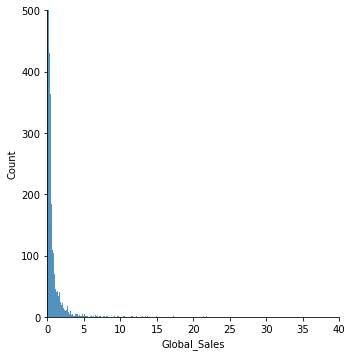

In [9]:
##On visualise la distribution des variables numériques

##On commence par la variable cible Global_Sales
sns.displot(x = 'Global_Sales', data = df);
plt.ylim(0,500)
plt.xlim(0,40)
##La distribution très concentrée proche de 0 rend la visualisation difficile (on pourrait utiliser une échelle logarithmique)
##On préfère utiliser la méthode describe
df.describe()
## La moyenne est à 0.54, plus haute que le 3ème quartile (0.48). On voit qu'il existe quelques outliers qui correspondent aux 
## jeux vendus entre 10 et ~80 M de copies, qui sont des exceptions par rapport à la masse des jeux vidéos mis sur le marché et qui 
## "tirent" la moyenne vers le haut. Un quart des jeux a des ventes globales < 0.06 M.

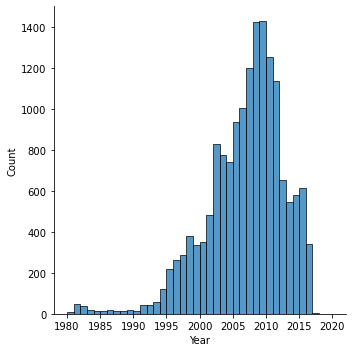

In [10]:
##On regarde la distribution des années de sortie
sns.displot(x = 'Year', data = df, bins  = 40);

##Nos données commencent au années 1980 et finissent vers 2016-2017. Le pic de nombre de jeux sortis se trouve vers 2009.

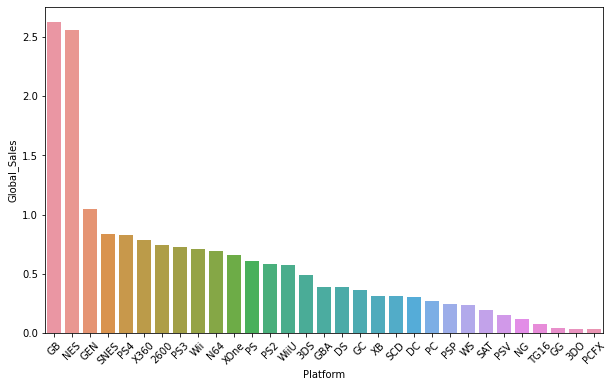

In [11]:
## Plutôt que de regarder la distribution des variables catégorielles, on peut directement leur relation avec la variable cible.
## On représente les ventes moyennes par plateforme de jeux
df_pf = df[['Global_Sales', 'Platform']].groupby('Platform').mean()
df_pf = df_pf.sort_values(by = 'Global_Sales', ascending = False)

fig, ax1 = plt.subplots(figsize=(10,6))
sns.barplot(ax = ax1, x = df_pf.index, y = df_pf['Global_Sales'])
plt.xticks(rotation = 45);

## On voit que les jeux de Gameboy et de NES se sont vendus en beaucoup plus d'exemplaires en moyenne que les jeux sortis 
## sur des plateformes plus récentes.
## Cela est sans doute du à une offre de jeux vidéos plus réduite dans les années 90 par rapport aux années 2000 et 2010 
## (confirmé par le graphique précédent), ce qui fait que chaque jeux se vendait en un plus grand nombre d'exemplaires

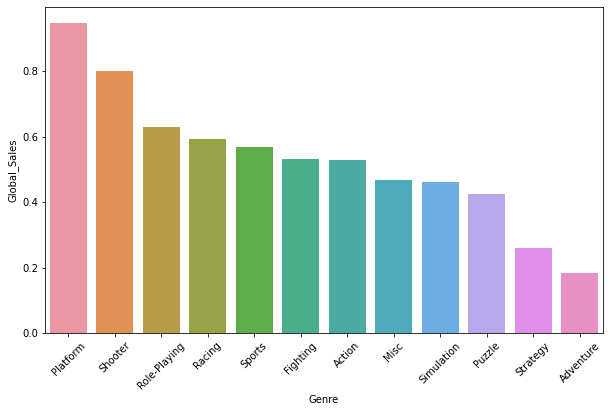

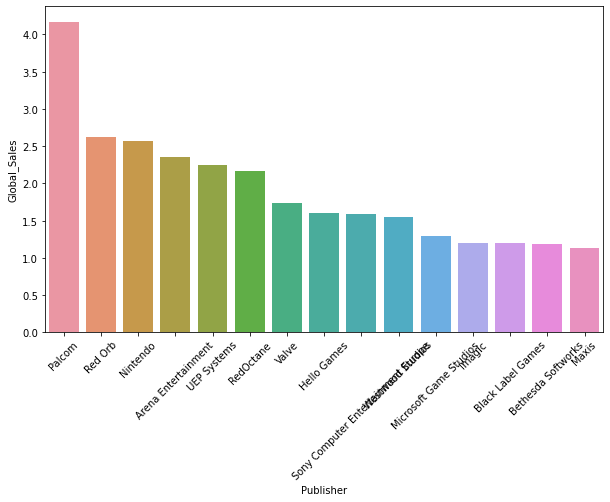

In [12]:
## On fait la même chose pour le genre et l'éditeur
df_ge = df[['Global_Sales', 'Genre']].groupby('Genre').mean()
df_ge = df_ge.sort_values(by = 'Global_Sales', ascending = False)

fig, ax1 = plt.subplots(figsize=(10,6))
sns.barplot(ax = ax1, x = df_ge.index, y = df_ge['Global_Sales'])
plt.xticks(rotation = 45);

## La catégorie de jeux la plus vendue est 'plateform' Les jeux sur Gameboy et NES contribuent sans doute à la haute valeur de 
###cette catégorie

## Il y a une très grande quantité d'éditeurs dans le dataset, on choisit de représenter les 15 dont les jeux se vendent le plus
## Remarque : avant d'entrainer le modèle, il faudra sans doute transformer cette variable en autre chose comme la taille de 
## l'éditeur (petit, moyen, grand)

df_pub = df[['Global_Sales', 'Publisher']].groupby('Publisher').mean()
df_pub = df_pub.sort_values(by = 'Global_Sales', ascending = False)
df_pub = df_pub.iloc[:15]

fig, ax1 = plt.subplots(figsize=(10,6))
sns.barplot(ax = ax1, x = df_pub.index, y = df_pub['Global_Sales'])
plt.xticks(rotation = 45);



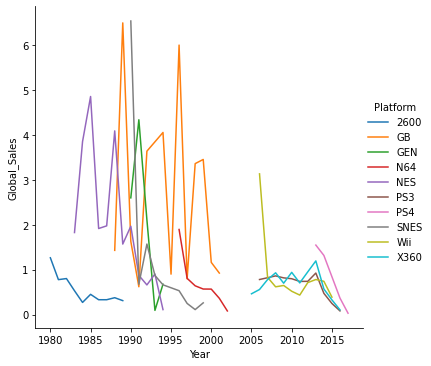

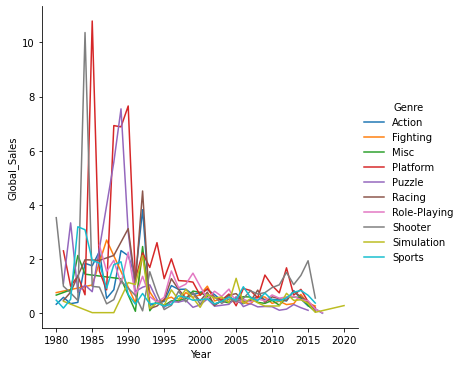

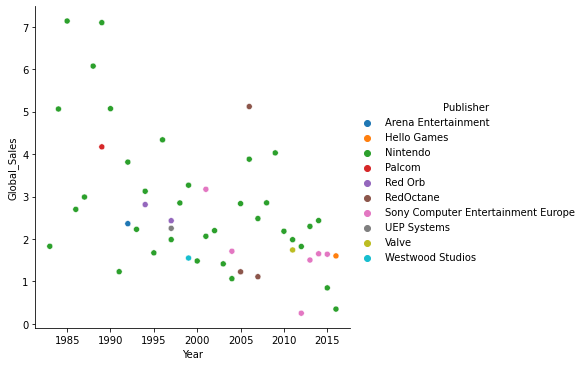

In [13]:
## J'ai pensé qu'il était interessant de voir si les plateformes, genres et éditeurs des jeux les plus vendus étaient constant
## dans le temps ou non
## Pour les plateformes, il est évident que les ventes des jeux vont varier fortement avec le temps. Comme les genres et éditeurs
## sont liés aux plateformes (par exemple : jeux de plateformes édités par nintendo et konami pour les jeux sur GB et NES),
## ils devraient aussi varier avec le temps.

df_pf_top = df_pf.iloc[:10]
df_pf_y = df[['Global_Sales', 'Year', 'Platform']]
df_pf_y = df_pf_y[df_pf_y['Platform'].isin(df_pf_top.index)]
df_pf_m = df_pf_y.groupby(['Platform', 'Year']).mean()

sns.relplot(x = 'Year', y = 'Global_Sales', data = df_pf_m, hue = 'Platform', kind = 'line')

df_ge_top = df_ge.iloc[:10]
df_ge_y = df[['Global_Sales', 'Year', 'Genre']]
df_ge_y = df_ge_y[df_ge_y['Genre'].isin(df_ge_top.index)]
df_ge_m = df_ge_y.groupby(['Genre', 'Year']).mean()

sns.relplot(x = 'Year', y = 'Global_Sales', data = df_ge_m, hue = 'Genre', kind = 'line')

df_pub_top = df_pub.iloc[:10]
df_pub_y = df[['Global_Sales', 'Year', 'Publisher']]
df_pub_y = df_pub_y[df_pub_y['Publisher'].isin(df_pub_top.index)]
df_pub_m = df_pub_y.groupby(['Publisher', 'Year']).mean()

sns.relplot(x = 'Year', y = 'Global_Sales', data = df_pub_m, hue = 'Publisher', kind = 'scatter')

## Dans tous les graphs, on voit des ventes plus importantes autour des années 90. 
## La "chute" des ventes à la fin du dataset vers 2015 est peut-être du au fait que le dataset n'inclue pas les ventes 
## après 2017 des jeux sortis vers 2015. Il faudra sans doute couper le dataset quelque part dans les années 2010 pour retirer 
## ce biais avant d'entrainer le modèle.

## Les ventes selon les plateformes donnent les résultats attendus, on voit que chaque plateforme a sa durée de vie

## Les ventes par catégories montrent une évolution des jeux les plus vendus du genre plateforme au genre shooter.

## Les ventes par éditeurs montrent que l'éditeur Nintendo produit les jeux les plus vendus sur presque toute la période.
## Pour le reste, beaucoup de jeux dans le graphs sont les seuls édités par leur éditeur (confirmé plus bas), ce qui pose 
## à nouveau la question du preprocessing de cette variable. Il y a sans doute le même éditeur sous différent nom dans le dataset


In [14]:
print(df_pub_y['Publisher'].value_counts())
print(df[df['Publisher'] == 'Valve'])
print(df[df['Publisher'] == 'Palcom'])

Nintendo                              696
Sony Computer Entertainment Europe     15
RedOctane                               4
Red Orb                                 2
Arena Entertainment                     2
UEP Systems                             1
Westwood Studios                        1
Hello Games                             1
Valve                                   1
Palcom                                  1
Name: Publisher, dtype: int64
          Name Platform    Year    Genre Publisher  Global_Sales
1016  Portal 2      PS3  2011.0  Shooter     Valve          1.74
                             Name Platform    Year   Genre Publisher  \
276  Teenage Mutant Ninja Turtles      NES  1989.0  Action    Palcom   

     Global_Sales  
276          4.17  


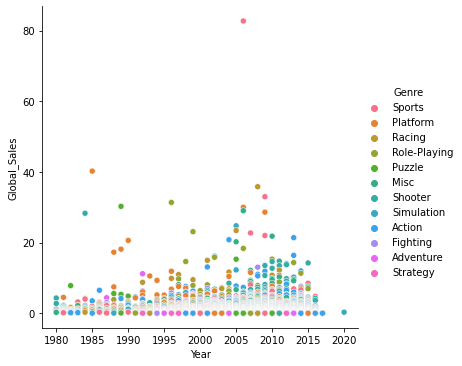

In [15]:
# On peut aussi directement regarder les ventes par années de l'ensemble des jeux.

sns.relplot(x='Year',hue='Genre',y='Global_Sales',data=df);

In [16]:
"""
Globalement, on remarque que les relations entre les variables explicatives et les ventes sont très différentes selon les époques
Si notre modèle servait à prédire des ventes de jeux vidéos en 2021, on pourrait se poser la question de la pertinence d'utiliser 
des données des années 80 et 90 pour entrainer notre modèle.
"""

"\nGlobalement, on remarque que les relations entre les variables explicatives et les ventes sont très différentes selon les époques\nSi notre modèle servait à prédire des ventes de jeux vidéos en 2021, on pourrait se poser la question de la pertinence d'utiliser \ndes données des années 80 et 90 pour entrainer notre modèle.\n"